<a href="https://colab.research.google.com/github/Joao-vitor1/training-CNNs/blob/main/aprendizado_profundo_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
fashion_dict = ['T-shit/top', 'Trouser','pulllover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


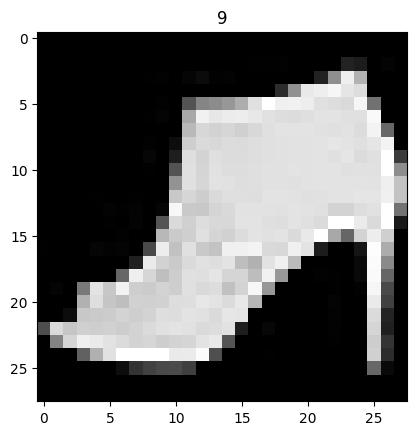

In [ ]:
index = 11
plt.imshow(X_train[79],cmap='gray')
plt.title(f'{y_train[0]}')
plt.show()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
num_classes =  10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),
        layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),
        layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'),
        layers.Conv2D(256, kernel_size=(3,3), activation = 'relu'),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
    )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,410 (1.49 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 128
epochs = 10
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, stratify= y_train)

In [ ]:
print(X_train.shape,X_val.shape, y_train.shape, y_val.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data=(X_val,y_val),
                    shuffle=True)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 218ms/step - accuracy: 0.6018 - loss: 1.0497 - val_accuracy: 0.8123 - val_loss: 0.4886
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 186ms/step - accuracy: 0.8000 - loss: 0.5260 - val_accuracy: 0.8552 - val_loss: 0.3911
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 187ms/step - accuracy: 0.8403 - loss: 0.4286 - val_accuracy: 0.8714 - val_loss: 0.3541
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 184ms/step - accuracy: 0.8549 - loss: 0.3887 - val_accuracy: 0.8808 - val_loss: 0.3260
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 182ms/step - accuracy: 0.8657 - loss: 0.3629 - val_accuracy: 0.8897 - val_loss: 0.3022
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.8746 - loss: 0.3412 - val_accuracy: 0.8914 - val_loss: 0.3003
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - accuracy: 0.8821 - loss: 0.3248 - val_accuracy: 0.8976 - val_loss: 0.2789
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 184ms/step - accuracy: 0.8836 - loss: 0

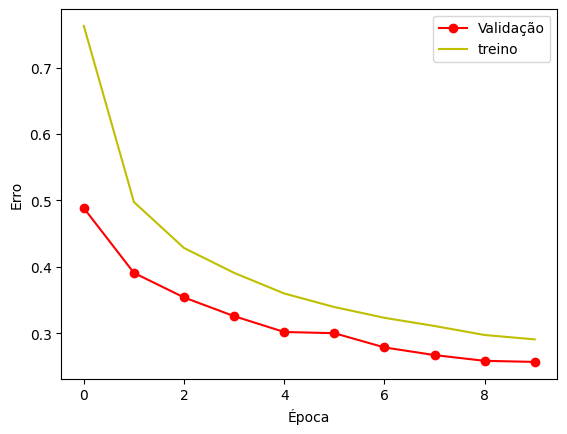

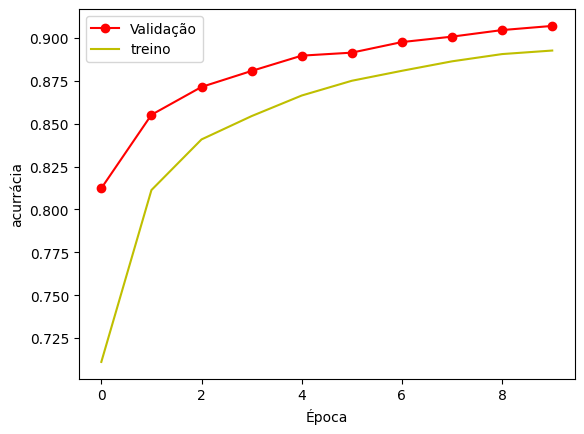

In [ ]:
plt.figure()
plt.plot(history.epoch, history.history['val_loss'], "o-r",label='Validação')
plt.plot(history.history['loss'], "-y",label='treino')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()

plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], "o-r",label='Validação')
plt.plot(history.history['accuracy'], "-y",label='treino')
plt.xlabel('Época')
plt.ylabel('acurrácia')
plt.legend()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2789387106895447
Test accuracy: 0.896399974822998


In [ ]:
y_teste_hat = model.predict(X_test)
y_pred = np.argmax(y_teste_hat, axis=1)
y_true = np.argmax(y_test, axis=1)

print(y_pred.shape, y_true.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
(10000,) (10000,)


<Axes: >

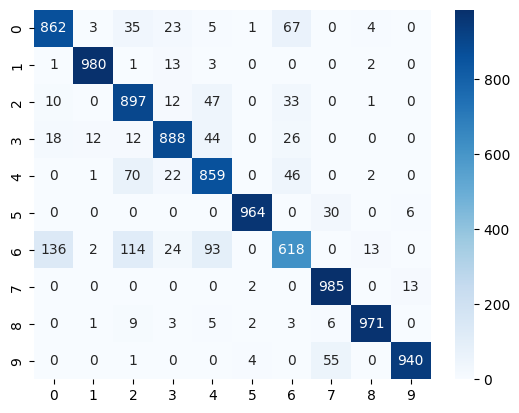

In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt= ".0f", cmap='Blues')
